In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file into DataFrame
df=pd.read_csv('customer_churn.csv',na_values=' ')
pd.set_option('display.max_columns', 25)

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

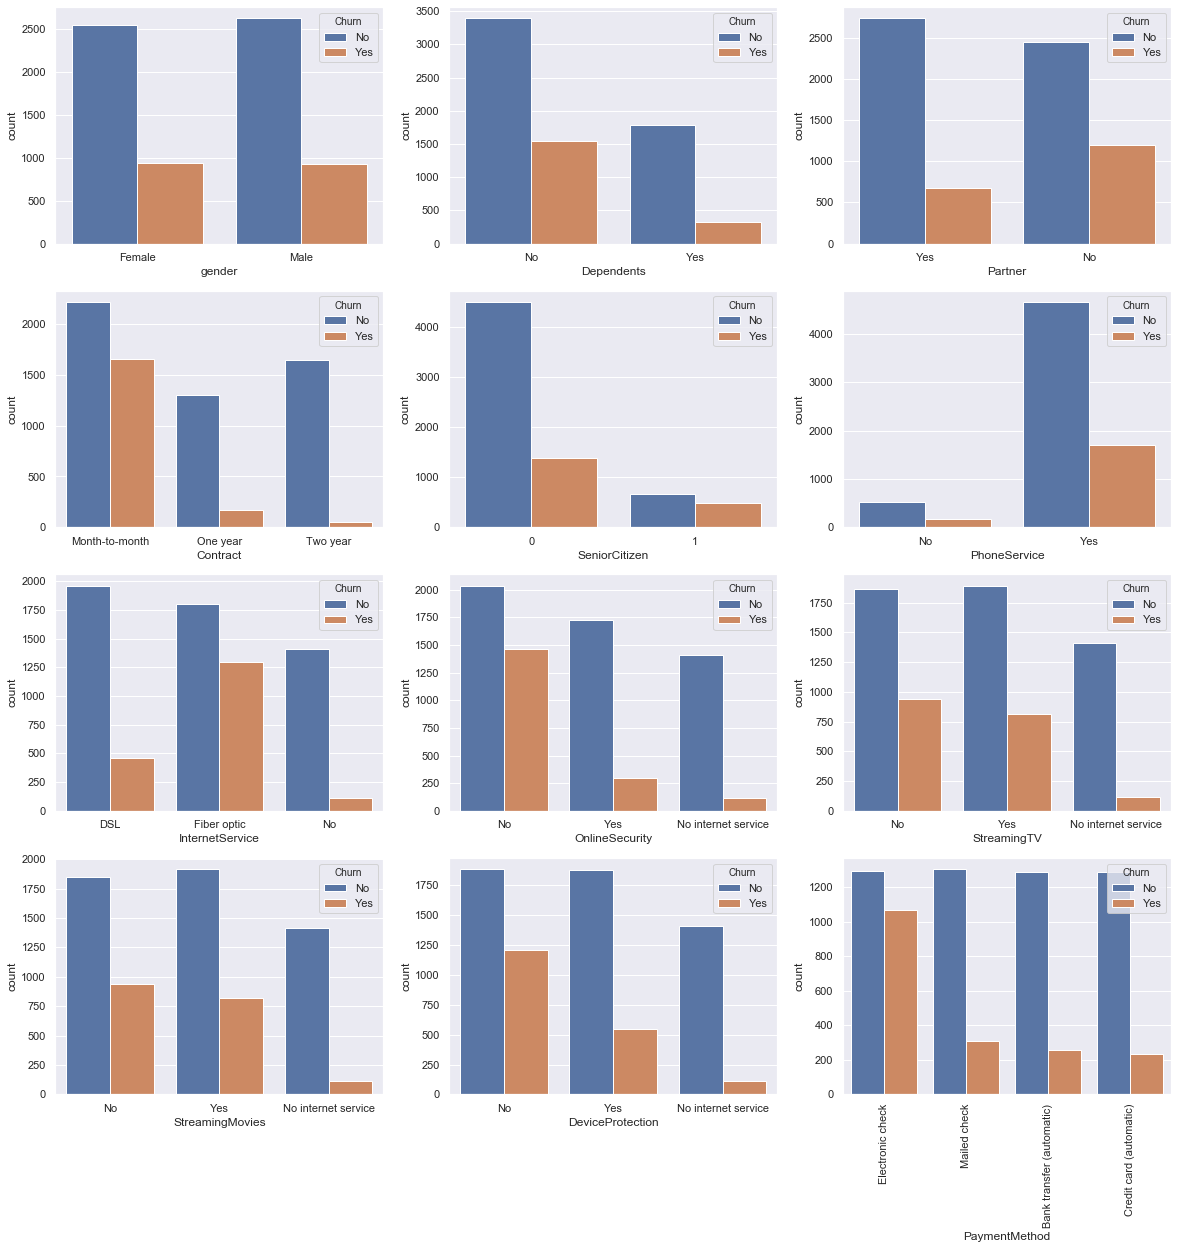

In [7]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=4,ncols=3)
fig.set_size_inches(20,20)
sns.countplot(x='gender',hue='Churn',data=df,ax=axes[0,0])
sns.countplot(x='Dependents',hue='Churn',data=df,ax=axes[0,1])
sns.countplot(x='Partner',hue='Churn',data=df,ax=axes[0,2])
sns.countplot(x='Contract',hue='Churn',data=df,ax=axes[1,0])
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,ax=axes[1,1])
sns.countplot(x='PhoneService',hue='Churn',data=df,ax=axes[1,2])
sns.countplot(x='InternetService',hue='Churn',data=df,ax=axes[2,0])
sns.countplot(x='OnlineSecurity',hue='Churn',data=df,ax=axes[2,1])
sns.countplot(x='StreamingTV',hue='Churn',data=df,ax=axes[2,2])
sns.countplot(x='StreamingMovies',hue='Churn',data=df,ax=axes[3,0])
sns.countplot(x='DeviceProtection',hue='Churn',data=df,ax=axes[3,1])
sns.countplot(x='PaymentMethod',hue='Churn',data=df,ax=axes[3,2])
plt.xticks(rotation=90)
plt.show()

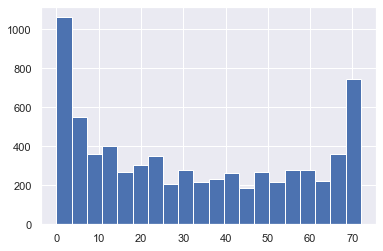

In [8]:
df['tenure'].hist(bins=20)

In [9]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [10]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


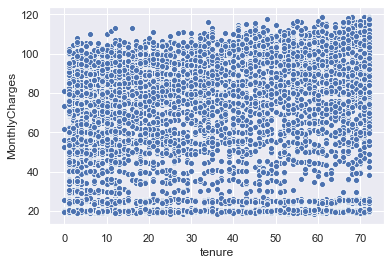

In [11]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df)

In [12]:
#DROPPING THE CUSTOMER ID
df.drop(['customerID'],axis=1,inplace=True)

In [13]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
#FILLING THE NULL VALUES OF TOTAL CHARGES WITH MULTIPLYING  df['MonthlyCharges']*df['tenure']
df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'],inplace=True)

In [15]:
#HVARIABLE CONTAINING ALL THE CATEGORICAL VALUES
x_categorical=df.select_dtypes(exclude=['int64','float64'])

In [16]:
x_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
#ENCODING ALL THE CATEGORICAL VALUES USING LABEL ENCODER
le=LabelEncoder()
x_categorical=x_categorical.apply(le.fit_transform)

In [19]:
x_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [20]:
#CREATING VARIABLE CONTAINING THE NUMERICAL VALUES
x_numerical=df.select_dtypes(include=['int64','float64'])

In [21]:
x = pd.concat([x_categorical, x_numerical], axis=1)

In [22]:
y=x['Churn']

In [23]:
x=x.drop(['Churn'],axis=1)

In [24]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.8161816891412349
accuracy_score corresponding to random state: 43 is: 0.8119233498935415
accuracy_score corresponding to random state: 44 is: 0.8041163946061036
accuracy_score corresponding to random state: 45 is: 0.8190205819730305
accuracy_score corresponding to random state: 46 is: 0.8034066713981547
accuracy_score corresponding to random state: 47 is: 0.7863733144073811
accuracy_score corresponding to random state: 48 is: 0.8048261178140526
accuracy_score corresponding to random state: 49 is: 0.8105039034776437
accuracy_score corresponding to random state: 50 is: 0.7998580553584103
accuracy_score corresponding to random state: 51 is: 0.7955997161107168
accuracy_score corresponding to random state: 52 is: 0.8097941802696949
accuracy_score corresponding to random state: 53 is: 0.8112136266855926
accuracy_score corresponding to random state: 54 is: 0.794889992902768
accuracy_score corresponding to random state: 55 is: 0.7941802696

In [25]:
#APPLYING DTC ALGORITHM
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 80))
param_grid = dict(min_samples_split=sample_split_range)
grid_search=GridSearchCV(dtc, param_grid, cv=15, scoring='accuracy')

In [26]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=79,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=47,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8509052183173589
The F1 Score is: 0.8465317972212623
The score is: 0.7629524485450674
The F1 Score is: 0.7593959356389691


In [29]:
#APPLYING SVC ALGORITHM
from sklearn.svm import SVC
model=SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(model, param_grid, cv=3)

In [30]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
grid1_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
from sklearn.metrics import f1_score
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8130990415335463
The F1 Score is: 0.7979306632440387
The score is: 0.7714691270404542
The F1 Score is: 0.7553313638351384


In [33]:
##APPLYING ENSEMBLE METHOD USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model_new=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25],    
    'min_samples_leaf': [1, 2, 4, 10, 15 ],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid2_search = GridSearchCV(model_new, params, cv = 3)

In [34]:
grid2_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
grid2_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
model_new = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8310259140930067
The F1 Score is: 0.8246346725899265
The score is: 0.7892122072391767
The F1 Score is: 0.7820042806976337


In [37]:
#Further Check and found RAndom Forest Classifier is giving te best results

In [38]:
from sklearn.externals import joblib
joblib.dump(model_new,'Customer_churn_classification.pkl')

['Customer_churn_classification.pkl']